## Analysis of 1st day in the RCF study
Checking amygdala activation in the CS+>baseline condition of the task
- masking amygdala
- avergaing activation
- plot

In [11]:
# load libraries
import glob
import pandas as pd
import numpy as np
import nilearn
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import cmdstanpy
import arviz as az

In [2]:
## Screening subjects by SCR as Nachshon analyzed - 67% as US:
subject_list = ['029','040','1074','1205','1223','1237','1245','1247',
               '1280','1301','1337','1350','1359','1374','1392','020',
               '1072','1099','1206','1212','1216','1258','1266','1268',
               '1320','1340','1345','1346','1362','1379','1393','1457','1460',
               '1373','1272','1291','1309'] # '1269','1271','1319', '1220','1376',
len(subject_list)

37

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/helpers.py:145: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  return func(*args, **kwargs)


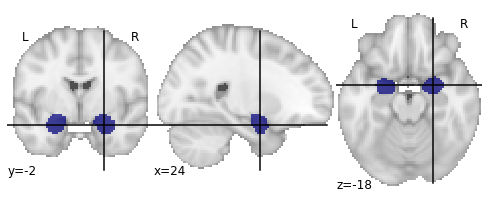

In [3]:
# load mask
mask_file = 'amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=20", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)

# create a masker 
fwhm = 4
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=fwhm, standardize=False, detrend=False, verbose=5)

In [4]:
us_cond = '/media/Data/work/RCF_or_FSL/Sink_respFSL/1stLevel/_subject_id_{sub}/_modelestimate0/results/cope{cope_num}.nii.gz'
cope_num = 2#taking cs+ >baseline


In [5]:
us = []
timeseriesAmg = []
for sub in subject_list:
    func = us_cond.format(sub=sub, cope_num= cope_num)
    print(func)
    sub = func.split('id_')[1].split('/')[0]
    print(sub)
    # amygdala
    tArr = masker.fit_transform(func)
    meanT = np.mean(tArr,axis=1)
    sem = scipy.stats.sem(tArr, axis=1)
    std = np.std(tArr, axis=1)
   
    # create datafram for the timeseries
    dfTS = {'subject':sub, 'ts':tArr[0]}
    # create dataframe for the mean activation
    df = {'subject':sub, 'amygdala':meanT[0], 'amgsem':sem[0], 'amgstd':std[0]}
    #df['subject'] = sub
    us.append(df)
    timeseriesAmg.append(dfTS)
amg_ud = pd.DataFrame(us)
tsDf = pd.DataFrame(timeseriesAmg)

/media/Data/work/RCF_or_FSL/Sink_respFSL/1stLevel/_subject_id_029/_modelestimate0/results/cope2.nii.gz
029
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RCF_or_FSL/Sink_respFSL/1stLevel/_subject_id_040/_modelestimate0/results/cope2.nii.gz
040
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RCF_or_FSL/Sink_respFSL/1stLevel/_subject_id_1374/_modelestimate0/results/cope2.nii.gz
1374
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RCF_or_FSL/Sink_respFSL/1stLevel/_subject_id_1340/_modelestimate0/results/cope2.nii.gz
1340
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RCF_or_FSL/Sink_respFSL/1stLevel/_subject_id_1345/_modelestimate0/results/cope2.nii.gz
1345
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape

In [12]:
amg_ud.head()

,subject,amygdala,amgsem,amgstd
0,029,0.414806,0.019031,0.580664
1,040,-0.075012,0.029197,0.890876
2,1074,0.267230,0.017850,0.544632
3,1205,0.551050,0.023312,0.711315
4,1223,0.214157,0.021194,0.646665


## look at group differences

In [13]:
groupDF = pd.read_csv('groups.csv')
groupDF['subject'] = groupDF['subject'].astype(int).astype(str)
for i in groupDF.iterrows():
    # change two numbers to three
    if len(i[1].subject) < 4:
        groupDF.at[i[0],'subject'] = '0' + i[1].subject


groupDF.head()

,group,subject
0,PTSD,035
1,CC,011
2,PTSD,040
3,PTSD,029
4,CC,020


In [14]:
# merge group and stimulus data
dfAll = pd.merge(groupDF, amg_ud)
dfAll.head()

,group,subject,amygdala,amgsem,amgstd
0,PTSD,040,-0.075012,0.029197,0.890876
1,PTSD,029,0.414806,0.019031,0.580664
2,CC,020,0.164335,0.026174,0.798633
3,CC,1072,0.780257,0.031374,0.957292
4,PTSD,1074,0.267230,0.017850,0.544632


<AxesSubplot:title={'center':'amygdala'}, xlabel='group', ylabel='amygdala'>

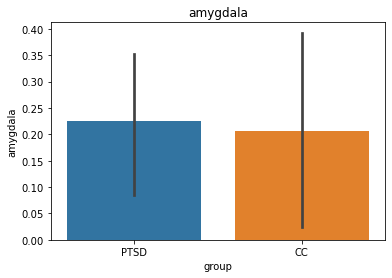

In [15]:
#g = sns.FacetGrid(dfAll, col="group", col_wrap=3)
plt.title("amygdala")
sns.barplot(x="group", y="amygdala", data=dfAll, ci=68)

In [16]:
t = scipy.stats.ttest_ind(dfAll['amygdala'][dfAll['group']=='CC'],dfAll['amygdala'][dfAll['group']=='PTSD'], 
                     equal_var = True)

# two tailed
t

Ttest_indResult(statistic=-0.0793740613336789, pvalue=0.9371871999075287)

## Using STAN to compare groups

In [17]:
#To select rows whose column value is in list 
groups = ["CC", "PTSD"]
dg = dfAll[dfAll.group.isin(groups)]

# changing group to numbers before we run stan model
group = {'CC': 0,'PTSD': 1} 
dg.group = [group[item] for item in dg.group] 
dg.head()

,group,subject,amygdala,amgsem,amgstd
0,1,040,-0.075012,0.029197,0.890876
1,1,029,0.414806,0.019031,0.580664
2,0,020,0.164335,0.026174,0.798633
3,0,1072,0.780257,0.031374,0.957292
4,1,1074,0.267230,0.017850,0.544632


In [18]:
# how many in each group
dg.groupby(['group']).count()

,subject,amygdala,amgsem,amgstd
group,,,,
0,19,19,19,19
1,18,18,18,18


In [19]:
data =  {'N': len(dg), 'x': dg['group'].values, 'y': dg['amygdala'].values}
sm = cmdstanpy.CmdStanModel(stan_file='Stan_model/simple_model.stan')


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/or/SIA_PTSD/Stan_model/simple_model


In [20]:
# Train the model and generate samples
seed = 1332 # set random seed
fit_simple_model = sm.sample(
  data = data,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  seed = seed
  #inits = 0.2,
)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


In [21]:
#fit
fit_simple_model.summary(percentiles=(4.5,95.5))

,Mean,MCSE,StdDev,4.5%,95.5%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,
lp__,-7.500,0.0300,1.300,-10.00,-6.10,1700.0,21000.0,1.0
alpha,0.200,0.0040,0.170,-0.11,0.48,1900.0,23000.0,1.0
beta,0.024,0.0054,0.240,-0.39,0.43,2000.0,24000.0,1.0
sigma,0.750,0.0018,0.092,0.61,0.92,2800.0,33000.0,1.0


In [1]:
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

alpha_mean, beta_mean = df['mean']['alpha'], df['mean']['beta']

# Extracting traces
alpha = fit['alpha']
beta = fit['beta']
sigma = fit['sigma']
lp = fit['lp__']

NameError: name 'fit' is not defined

0.9550867346938775

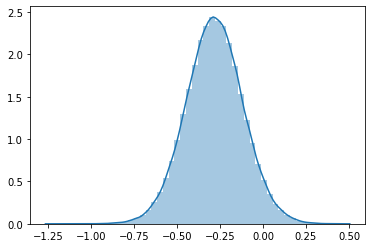

In [416]:
sns.distplot(beta)
sum(beta<0) / len(beta)